# Notebook for creating histograms of the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# read in my data
tbl = pd.read_csv('preprocessed_data_avg.csv')
porbs = pd.read_csv('FSRED Mags - Porb.csv')

states = pd.read_csv('FSRED Mags - total_source_list.csv')
nss = states[(states['NS/BH']=='NS') | (states['NS/BH']=='NS ') | (states['NS/BH']=='NS (UC)')]['Source'].to_list()
tbl = tbl[tbl['Source'].isin(nss)]

In [3]:
# read in Daves data
filepath = r"C:\Users\Iris Reitsma\Documents\Master\jaar 3\scriptie\optX\NSXBs-jhk.dat"

# read flash.dat to a list of lists
datContent = [i.strip().split() for i in open(filepath).readlines()]
data = pd.DataFrame(data=datContent[1:], columns=datContent[0])

# Drop nan rows
data = data.mask(data.eq('None')).dropna()

# Convert numbers to ints
data['log(Lx)'] = pd.to_numeric(data['log(Lx)'])
data['log(L_nu_OIR)'] = pd.to_numeric(data['log(L_nu_OIR)'])
display(data)

,"#Source,",log(Lx),log(L_nu_OIR),Filter
0,J1900,36.265431,18.718271,J
1,aqlx1,36.078077,19.383006,J
2,4U061,35.995698,18.192096,J
3,aqlx1,36.657518,19.583016,J
4,aqlx1,36.203739,19.663020,J
5,aqlx1,36.368468,19.823028,J
6,aqlx1,36.632191,19.983036,J
7,aqlx1,36.683142,19.903032,J
8,aqlx1,36.255825,19.623018,J
10,scox1,38.455331,20.372441,H


In [4]:
info_per_source = data.groupby('#Source,').mean()
display(info_per_source)

,log(Lx),log(L_nu_OIR)
"#Source,",,
4U061,35.995698,18.147723
4U1608,35.856901,18.827986
CirX1,38.630647,22.156886
CygX2,38.291103,21.054436
GX17+2,37.996129,20.232557
J0029,35.277723,18.456801
J1701,38.184882,20.118015
J1808,34.566254,18.260652
J1900,36.265431,18.718271


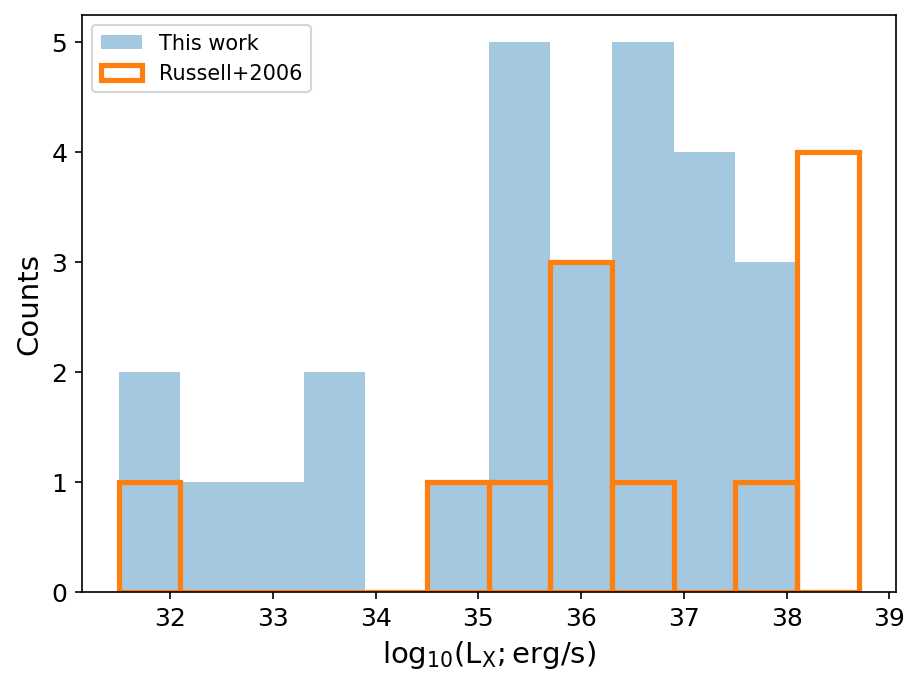

In [88]:
# X-ray lum

bins = np.arange(31.5, 39, 0.6)

Lx_me = tbl['log_L_X']
Lx_Dave = data['log(Lx)']

plt.figure(figsize = (7, 5), dpi=150)
plt.hist(Lx_me.unique(), bins=bins, label='This work', alpha=0.4)
plt.hist(info_per_source['log(Lx)'], bins=bins, label='Russell+2006', fill=False, edgecolor='C1', linewidth=2.5)
plt.legend()
plt.xlabel(r'$\mathrm{log_{10}(L_{X}; erg/s)}$', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
# plt.yticks([0,1,2,3,4])
plt.show()


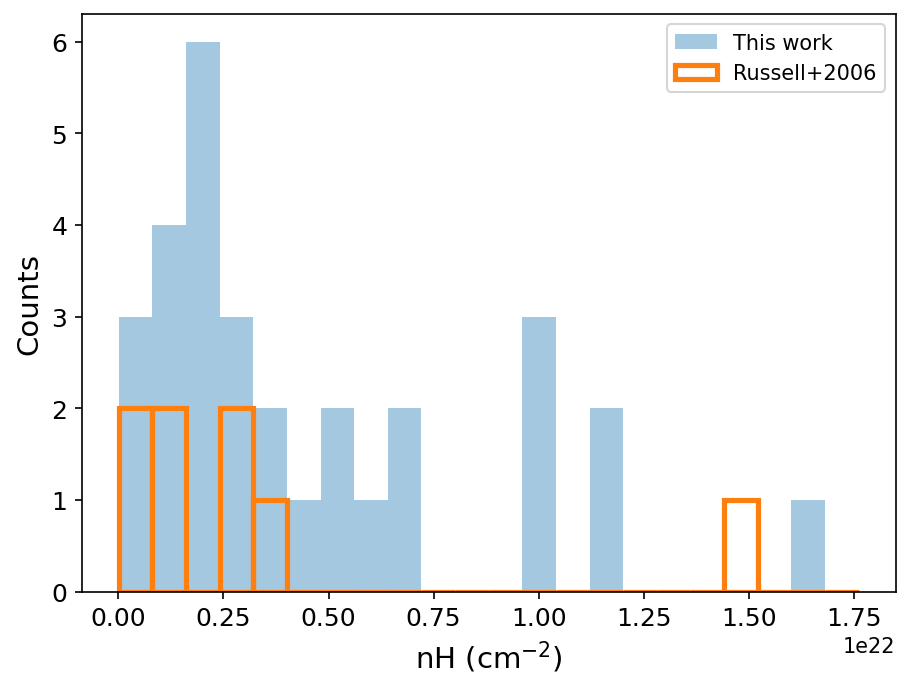

In [107]:

nH_me = tbl['nH']
nH_Dave = [2.8e21, 2.99e21, 0.9e21, 0.55e21, 15e21, 1.25e21, 0.11e21, 4e21]
bins = np.arange(0.01*1e21, 1.8*1e22, 8e20)
plt.figure(figsize = (7, 5), dpi=150)

plt.hist(nH_me.unique(), bins=bins, label='This work', alpha=0.4)
plt.hist(nH_Dave, bins=bins, label='Russell+2006', fill=False, edgecolor='C1', linewidth=2.5)
plt.legend()
plt.xlabel(r'nH (cm$^{-2}$)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
# plt.xticks(np.arange(1e19, 1.8*1e22, 3e21))
plt.show()


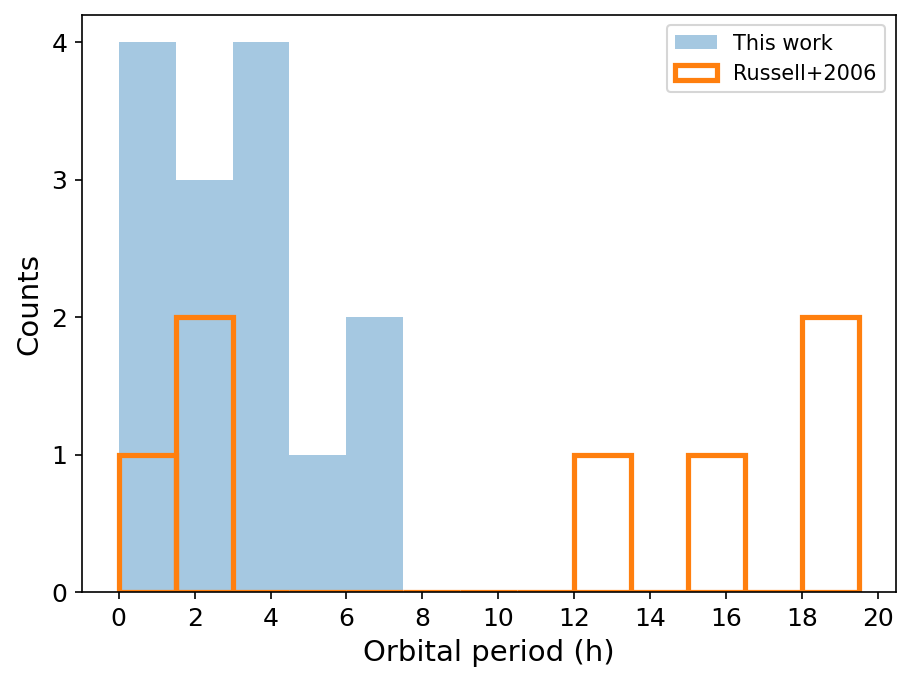

In [86]:
bins = np.arange(0, 20, 1.5)
Porb_me = porbs['Porb (h)']
Porb_Dave = [2.457, 0.29, 15.1, 12.9, 18.9, 2.0, 19] #h

plt.figure(figsize = (7, 5), dpi=150)

plt.hist(Porb_me, bins=bins, label='This work', alpha=0.4)
plt.hist(Porb_Dave, bins=bins, label='Russell+2006', fill=False, edgecolor='C1', linewidth=2.5)
plt.legend()
plt.xlabel('Orbital period (h)', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.tick_params(axis='both', labelsize=12)
plt.yticks([0,1,2,3,4])
plt.xticks(np.arange(0,22,2))

plt.show()
